In [1]:
import torch
torch.__version__

'2.0.1+cpu'

In [2]:
import torch
print(torch.cuda.is_available())


False


In [3]:
# pip install super-gradients==3.1.3

In [4]:
# py -3.10 -m venv myvenv
# myvenv\Scripts\activate


# !pip install super-gradients==3.1.0 #not stable version
# !pip install imutils

# !pip install roboflow

# !pip install pytube --upgrade

In [5]:
# import torch
# torch.cuda.get_device_name(0)

In [6]:
# pip install git+https://github.com/facebookresearch/segment-anything.git

In [7]:
# pip install super_gradients


In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [9]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   
    
def show_anns(anns):
    if len(anns)==0:
        return
    sorted_anns = sorted(anns, key-(lambda x: x['area']), reverse-True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[e], m.shape[1], 3))
        color_mask = np.random.random((1, 1)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

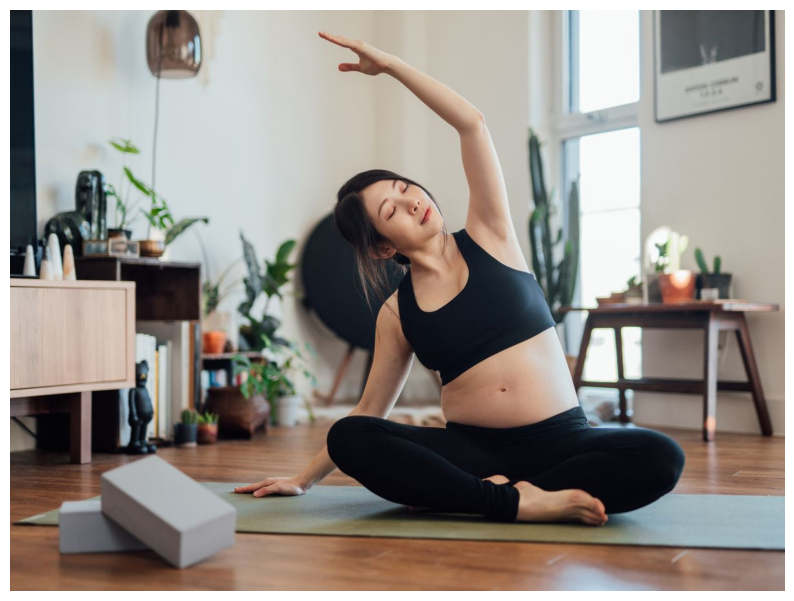

In [10]:
image = cv2.imread('images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

[2024-06-28 16:37:23] INFO - utils.py - NumExpr defaulting to 8 threads.


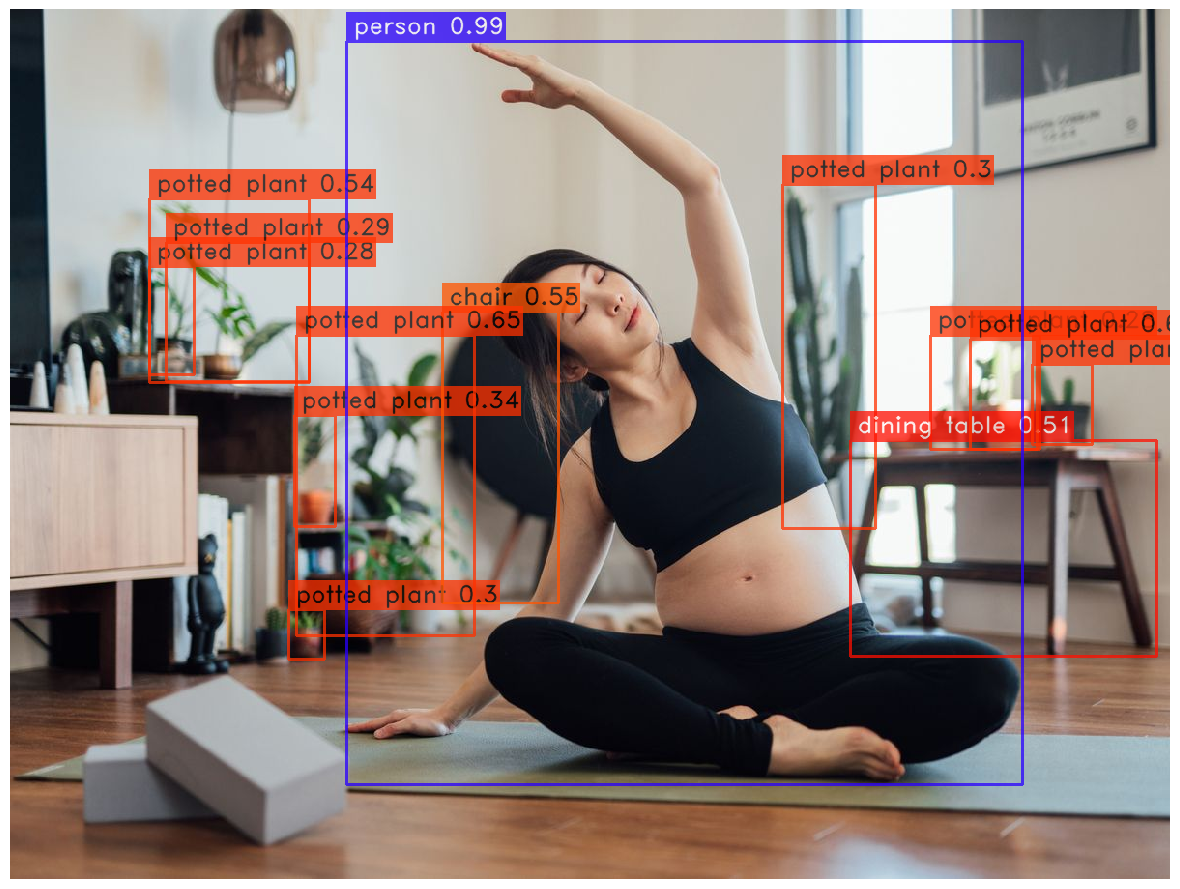

In [11]:
from super_gradients.training import models
import cv2
import matplotlib.pyplot as plt
import pickle

image_path = "images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg"

model = models.get("yolo_nas_l", pretrained_weights="coco")
model.predict(image, conf=0.25).show()

conf_threshold = 0.25

detection_pred = model.predict(image_path, conf=conf_threshold)

detections = detection_pred.save('output_folder') #save the output in a folder with detected bounding bax

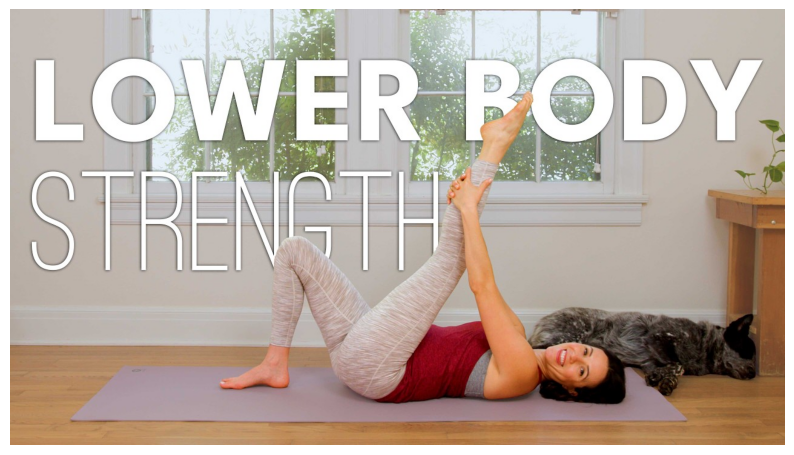

In [12]:
image2 = cv2.imread('images/maxresdefault.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image2)
plt.axis('off')
plt.show()

In [13]:
# pip install super-gradients

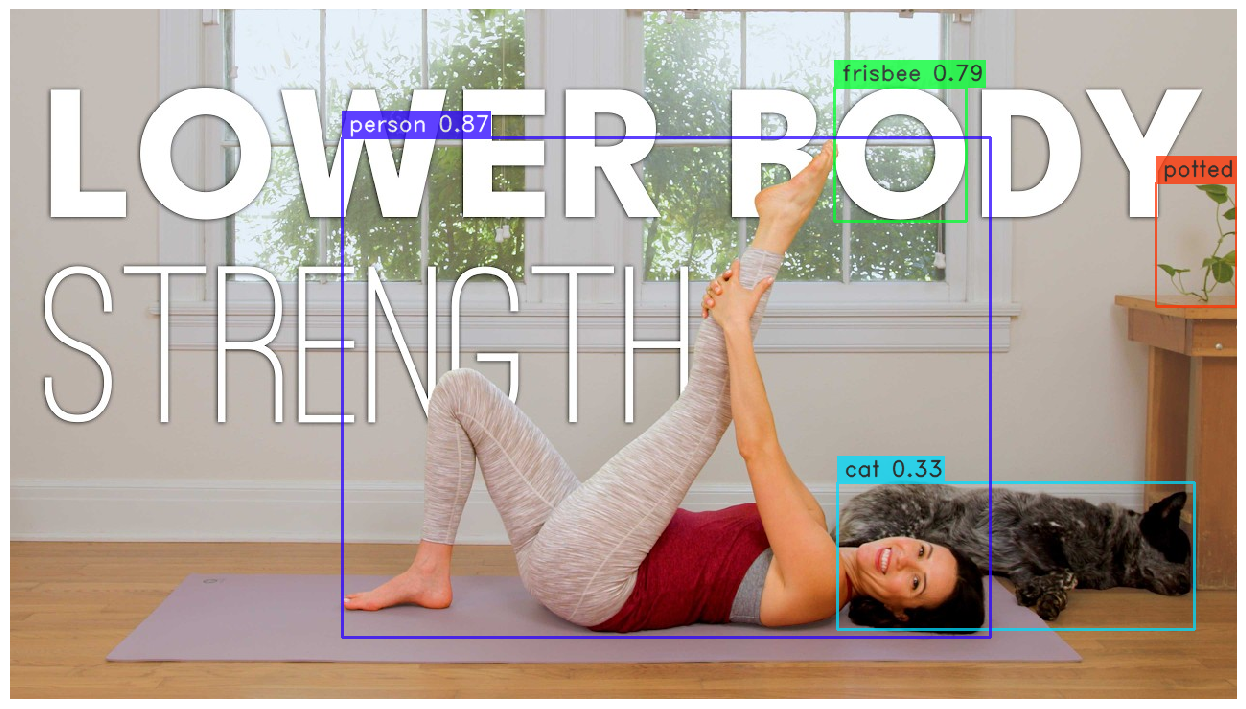

In [14]:
from super_gradients.training import models
import cv2
import matplotlib.pyplot as plt
import pickle

image_path = "images/maxresdefault.jpg"

model = models.get("yolo_nas_l", pretrained_weights="coco")
model.predict(image2, conf=0.25).show()

conf_threshold = 0.25

detection_pred = model.predict(image_path, conf=conf_threshold)

detections = detection_pred.save('output_folder') #save the output in a folder with detected bounding bax

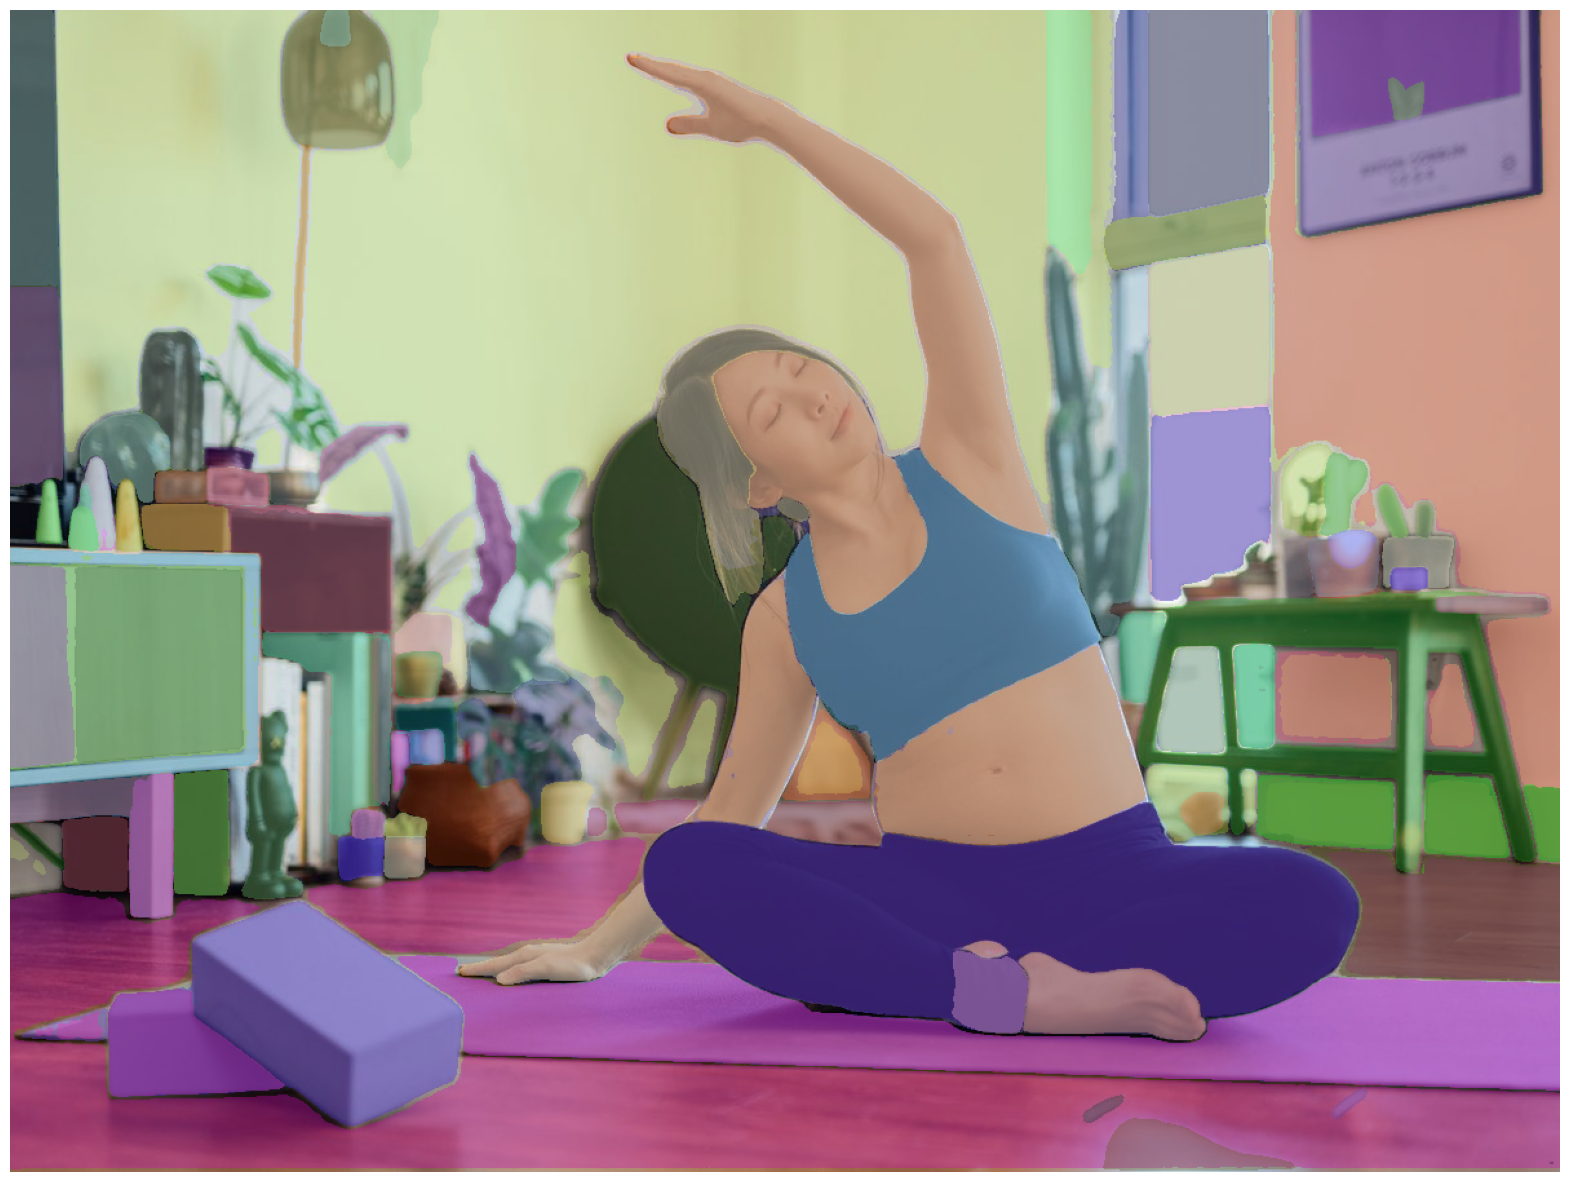

In [15]:
# Correct imports
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
import matplotlib.pyplot as plt
import torch

# Load image
image = cv2.imread("images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg")  # Ensure the path to your image is correct

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Ensure the checkpoint file is in the correct path
model_type = "vit_h"  # Fix typo in model type
device = "cuda" if torch.cuda.is_available() else "cpu"  # Ensure the device is set properly

# Load the model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize mask generator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# Function to display masks (define or import if not provided by the library)
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:, :, i] = color_mask[i]
        img[:, :, 3] = (m > 0) * 0.35
        ax.imshow(img)

# Display the image with masks
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)  # Use the function defined above
plt.axis('off')
plt.show()


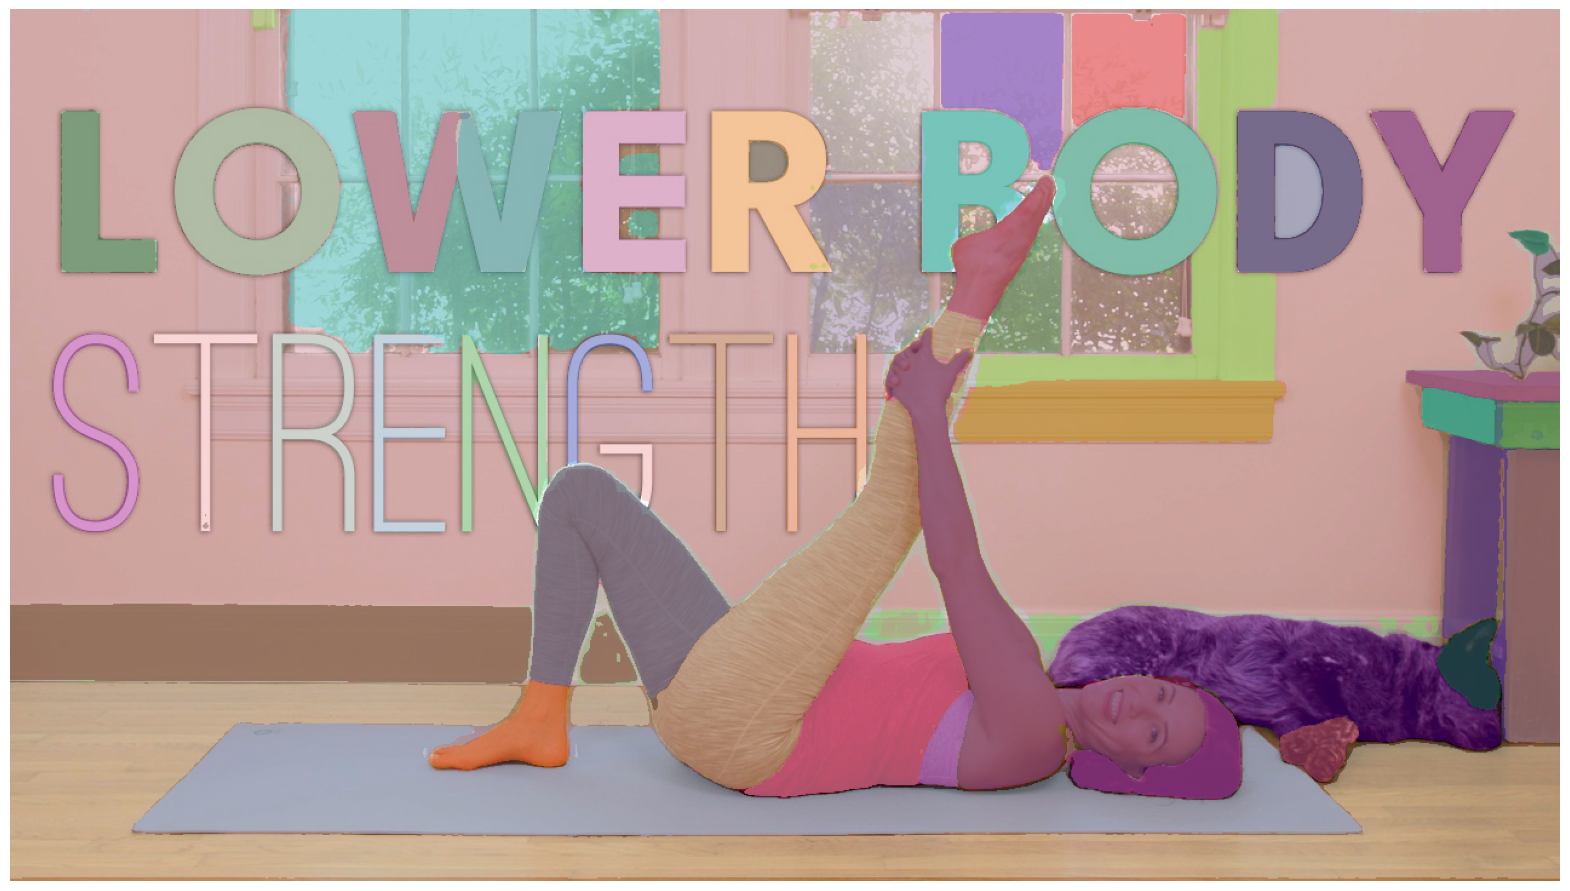

In [16]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np  # Add this import

# Load image
image_path = "images/maxresdefault.jpg"  # Ensure the path to your image is correct
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Ensure the checkpoint file is in the correct path
model_type = "vit_h"  # Fix typo in model type
device = "cuda" if torch.cuda.is_available() else "cpu"  # Ensure the device is set properly

# Load the model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize mask generator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# Function to display masks (define or import if not provided by the library)
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:, :, i] = color_mask[i]
        img[:, :, 3] = (m > 0) * 0.35
        ax.imshow(img)

# Display the image with masks
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)  # Use the function defined above
plt.axis('off')
plt.show()


In [17]:
from super_gradients.training import models

import cv2

image_path1 = 'images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg'

model1 = models.get("yolo_nas_l", pretrained_weights="coco")

conf_threshold1 = 0.25

detection_pred1 = model1.predict(image_path1, conf = conf_threshold1)._images_prediction_lst
detection_pred1

[ImageDetectionPrediction(image=array([[[ 20,  25,  31],
         [ 20,  25,  31],
         [ 20,  25,  31],
         ...,
         [180, 174, 160],
         [180, 174, 160],
         [180, 174, 160]],
 
        [[ 20,  25,  31],
         [ 20,  25,  31],
         [ 20,  25,  31],
         ...,
         [180, 174, 160],
         [180, 174, 160],
         [180, 174, 160]],
 
        [[ 20,  25,  31],
         [ 20,  25,  31],
         [ 20,  25,  31],
         ...,
         [180, 174, 160],
         [181, 175, 161],
         [181, 175, 161]],
 
        ...,
 
        [[144,  99,  70],
         [144,  99,  70],
         [145, 100,  71],
         ...,
         [154, 130, 120],
         [155, 131, 121],
         [157, 133, 123]],
 
        [[144,  99,  70],
         [144,  99,  70],
         [145, 100,  71],
         ...,
         [154, 130, 120],
         [155, 131, 121],
         [156, 132, 122]],
 
        [[144,  99,  70],
         [144,  99,  70],
         [145, 100,  71],
         ..

In [31]:
# Extract desired outputs

bboxes_xyxy1 = detection_pred1[0].prediction.bboxes_xyxy.tolist()

confidence1 = detection_pred1[0].prediction.confidence.tolist()

labels1 = detection_pred1[0].prediction.labels.tolist()

print("Bounding Boxes1 (xyxy):", bboxes_xyxy1)

print("Confidence1:", confidence1)

print("Labels1:", labels1)

bboxes_xyxy1,confidence1,labels1

([[348.0133361816406, 33.1926155090332, 1047.9833984375, 802.031982421875],
  [993.7869262695312, 341.9825744628906, 1062.9130859375, 455.08709716796875],
  [296.9212646484375,
   337.63311767578125,
   480.72381591796875,
   648.0309448242188],
  [1057.7841796875, 367.95025634765625, 1119.511474609375, 450.02313232421875],
  [447.51165771484375, 313.1364440917969, 567.714599609375, 614.2319946289062],
  [144.06637573242188,
   196.03573608398438,
   309.26385498046875,
   386.2877502441406],
  [869.4149780273438, 446.7665710449219, 1186.998779296875, 669.3427734375],
  [294.77911376953125,
   420.1495361328125,
   336.8026123046875,
   535.8339233398438],
  [288.7361755371094, 621.586669921875, 325.5224914550781, 672.8670043945312],
  [799.8555908203125, 181.3680419921875, 895.1849365234375, 537.8156127929688],
  [161.08009338378906,
   241.318603515625,
   309.05303955078125,
   385.7111511230469],
  [144.30833435058594, 266.1923828125, 190.93017578125, 378.4290771484375],
  [952.347

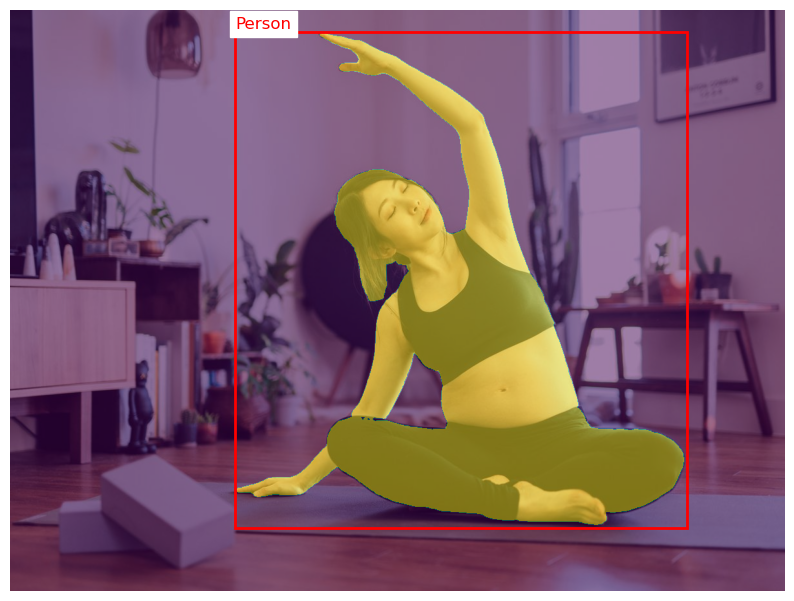

In [17]:
import sys
import torch
from super_gradients.training import models
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Image path
image_path = "images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg"
image = cv2.imread(image_path)

# Keep a copy of the original image for visualization
original_image = image.copy()

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(image)

image = image.transpose((2, 0, 1))  # Transpose to match SAM input format
image = image / 255.0  # Normalize image values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

model1 = models.get("yolo_nas_l", pretrained_weights="coco")
conf_threshold1 = 0.25
detection_pred1 = model1.predict(image_path, conf=conf_threshold1)._images_prediction_lst
bboxes_xyxy1 = detection_pred1[0].prediction.bboxes_xyxy.tolist()
input_box = np.array(bboxes_xyxy1[0])

labels = detection_pred1[0].prediction.labels.tolist()  # Get labels

if labels[0] == 0:
    # Predict masks using SAM
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Use the original image
    plt.imshow(masks[0], alpha=0.5)
    plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]), input_box[2]-input_box[0], input_box[3]-input_box[1],
                                      linewidth=2, edgecolor='r', facecolor='none'))
    plt.text(input_box[0], input_box[1] - 5, 'Person', fontsize=12, color='r', backgroundcolor='w')

    plt.axis('off')
    plt.savefig('output_folder/output3.png')
    plt.show()


In [16]:
import sys
import torch
from super_gradients.training import models
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Image path
image_path = "images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg"
image = cv2.imread(image_path)

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(image)

image = image.transpose((2, 0, 1))  # Transpose to match SAM input format
image = image / 255.0  # Normalize image values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

model1 = models.get("yolo_nas_l", pretrained_weights="coco")
conf_threshold1 = 0.25
detection_pred1 = model1.predict(image_path, conf=conf_threshold1)._images_prediction_lst
bboxes_xyxy1 = detection_pred1[0].prediction.bboxes_xyxy.tolist()
input_box = np.array(bboxes_xyxy1[0])

labels = detection_pred1[0].prediction.labels.tolist()  # Get labels

if labels[0] == 0:
    # Predict masks using SAM
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image.transpose((1, 2, 0)), cv2.COLOR_BGR2RGB))  # Transpose back to original shape
    plt.imshow(masks[0], alpha=0.5)
    plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]), input_box[2]-input_box[0], input_box[3]-input_box[1],
                                      linewidth=2, edgecolor='r', facecolor='none'))
    plt.text(input_box[0], input_box[1] - 5, 'Person', fontsize=12, color='r', backgroundcolor='w')

    plt.axis('off')
    plt.savefig('output_folder/output3.png')
    plt.show()


ValueError: axes don't match array

<Figure size 1000x1000 with 0 Axes>

In [15]:
import sys
sys.path.append("..")
from super_gradients.training import models
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Leage poth (mages/1.jpg"

image_path = "images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg"
image = cv2.imread('images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg')

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

predictor.set_image(image)

image = image.transpose((2, 0, 1)) # Transpose to match SAM input format

image = image/255.0 #Normalize image values to [0, 1

image = np.expand_dims(image, axis=0) #Add batch dimension


model1 = models.get("yolo_nas_l", pretrained_weights="coco")
conf_threshold1 = 0.25
detection_pred1 = model1.predict(image_path, conf = conf_threshold1)._images_prediction_lst
bboxes_xyxy1 = detection_pred1[0].prediction.bboxes_xyxy.tolist()
input_box = np.array(bboxes_xуху1[0])

if labels[0] == 0:
# Predict masks using St
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )
    
    
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if labels[0] == 0:
    plt.imshow(masks[0], alpha=0.5)
plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]), input_box[2]-input_box[0], input_box[3]-input_box[1],
                                  linewidth=2, edgecolor='r', facecolor='none'))
plt.text(input_box[0], input_box[1] - 5, 'Person', fontsize=12, color='r', backgroundcolor='w')

plt.axis('off')

plt.savefig('output_folder/output3.png')

plt.show()
# Display the image with mases and

NameError: name 'bboxes_xуху1' is not defined

In [19]:
from super_gradients.training import models

import cv2

image_path = 'images/maxresdefault.jpg'

model = models.get("yolo_nas_l", pretrained_weights="coco")

conf_threshold = 0.25

detection_pred = model.predict(image_path, conf = conf_threshold)._images_prediction_lst
detection_pred

[ImageDetectionPrediction(image=array([[[192, 185, 179],
         [192, 185, 179],
         [192, 185, 179],
         ...,
         [190, 186, 175],
         [190, 186, 175],
         [190, 186, 175]],
 
        [[192, 185, 179],
         [192, 185, 179],
         [192, 185, 179],
         ...,
         [190, 186, 175],
         [190, 186, 175],
         [190, 186, 175]],
 
        [[192, 185, 179],
         [192, 185, 179],
         [192, 185, 179],
         ...,
         [190, 186, 175],
         [190, 186, 175],
         [190, 186, 175]],
 
        ...,
 
        [[183, 131,  84],
         [183, 131,  84],
         [183, 131,  84],
         ...,
         [165, 112,  62],
         [165, 112,  62],
         [164, 111,  61]],
 
        [[183, 131,  84],
         [183, 131,  84],
         [183, 131,  84],
         ...,
         [168, 115,  63],
         [171, 115,  64],
         [170, 114,  63]],
 
        [[185, 133,  86],
         [185, 133,  86],
         [185, 133,  86],
         ..

In [20]:
# Extract desired outputs

bboxes_xyxy = detection_pred[0].prediction.bboxes_xyxy.tolist()

confidence = detection_pred[0].prediction.confidence.tolist()

labels = detection_pred[0].prediction.labels.tolist()

print("Bounding Boxes (xyxy):", bboxes_xyxy)

print("Confidence:", confidence)

print("Labels:", labels)

bboxes_xyxy
confidence
labels

[0.0, 29.0, 58.0, 15.0]

In [26]:
print("Bounding Boxes (xyxy):", bboxes_xyxy)
bboxes_xyxy

[[346.69232177734375,
  134.65240478515625,
  1022.120361328125,
  655.7727661132812],
 [860.3569946289062, 81.10520935058594, 997.8927001953125, 221.02877807617188],
 [1195.4781494140625,
  181.11563110351562,
  1279.9219970703125,
  310.0422058105469],
 [863.062255859375, 494.1971435546875, 1235.1256103515625, 647.392578125]]

In [22]:
confidence

[0.8683779239654541, 0.7912569046020508, 0.7496536374092102, 0.328633189201355]

In [22]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install torch torchvision torchaudio



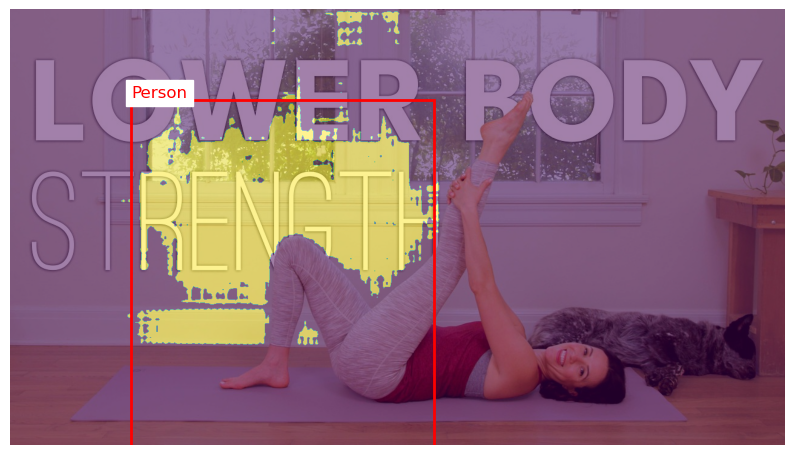

In [36]:
import torch
import sys

sys.path.append("..")

from super_gradients.training import models
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "images/maxresdefault.jpg"
image = cv2.imread(image_path)

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(image)

# Define bounding box and label for prediction
input_box = np.array([200, 150, 700, 800])  # Replace with accurate bounding box coordinates
labels = [0]  # Example label, replace with actual values

# Predict masks using SAM
if labels[0] == 0:
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

# Plot the image and mask
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

if labels[0] == 0:
    plt.imshow(masks[0], alpha=0.5)

plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]), input_box[2] - input_box[0], input_box[3] - input_box[1],
                                  linewidth=2, edgecolor='r', facecolor='none'))
plt.text(input_box[0], input_box[1] - 5, 'Person', fontsize=12, color='r', backgroundcolor='w')

plt.axis('off')
plt.savefig('output_folder/output3.png')
plt.show()


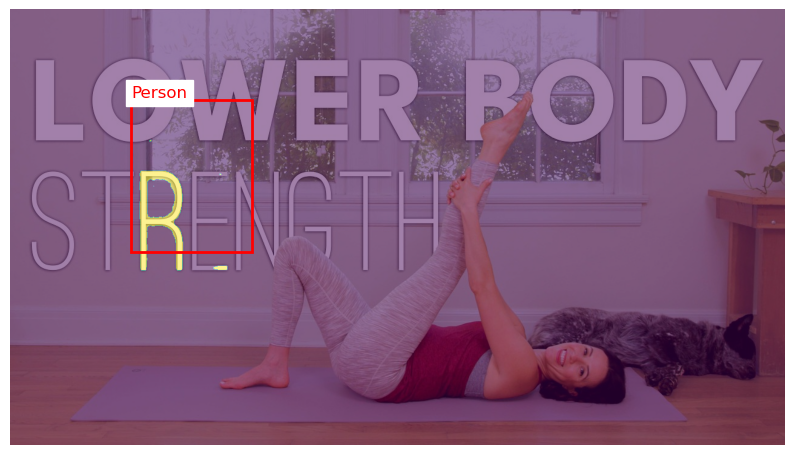

In [23]:
import torch
import sys

sys.path.append("..")

from super_gradients.training import models
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "images/maxresdefault.jpg"
image = cv2.imread(image_path)

# SAM Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(image)

# Define bounding box and label for prediction
input_box = np.array([200, 150, 400, 400])  # Replace with accurate bounding box coordinates
labels = [0]  # Example label, replace with actual values

# Predict masks using SAM
if labels[0] == 0:
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

# Plot the image and mask
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

if labels[0] == 0:
    plt.imshow(masks[0], alpha=0.5)

plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]), input_box[2] - input_box[0], input_box[3] - input_box[1],
                                  linewidth=2, edgecolor='r', facecolor='none'))
plt.text(input_box[0], input_box[1] - 5, 'Person', fontsize=12, color='r', backgroundcolor='w')

plt.axis('off')
plt.savefig('output_folder/output3.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Assuming 'image', 'labels', 'masks', and 'input_box' are already defined

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

if labels[e] == 0:
    plt.imshow(masks[0], alpha=0.5)

plt.gca().add_patch(plt.Rectangle(
    (input_box[0], input_box[1]),
    input_box[2] - input_box[0],
    input_box[3] - input_box[1],
    linewidth=2,
    edgecolor='r',
    facecolor='none'
))

plt.text(
    input_box[0],
    input_box[1] + 5,
    'Person',
    fontsize=12,
    color='r',
    backgroundcolor='w'
)

plt.axis('off')
plt.savefig('output_folder/output3.png')
plt.show()


In [ ]:
from segment_anything import sam_model_registry, SamPredictor
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
#image cv2.imread('images/1.jpg")
image = cv2.imread("images/pregnant-woman-practices-yoga-at-home-royalty-free-image-1643660763.jpg")

# SAN Model for Masking
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"



sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#predictor Sampredictor(san)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()